In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [4]:
#setting the directory to our dataset
root='E:\\New folder\ShanghaiTech_Crowd_Counting_Dataset'

In [5]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final\\train_data','images')
part_A_test = os.path.join(root,'part_A_final\\test_data','images')
part_B_train = os.path.join(root,'part_B_final\\train_data','images')
part_B_test = os.path.join(root,'part_B_final\\test_data','images')
path_sets = [part_A_test]

#print(path_sets)

In [6]:
img_paths = []
"""
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '.jpg')):
        img_paths.append(img_path)
"""
for path in path_sets:
    for img in os.listdir(path):
        full_path = os.path.join(path, img)
        if os.path.isfile(full_path):
            img_paths.append(full_path)
            #print(full_path)
img_paths

['E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_1.jpg',
 'E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_10.jpg',
 'E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_100.jpg',
 'E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_101.jpg',
 'E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_102.jpg',
 'E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_103.jpg',
 'E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_104.jpg',
 'E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_105.jpg',
 'E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_106.jpg',
 'E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\image

In [7]:
model = CSRNet()

In [8]:
model = model

In [9]:
checkpoint = torch.load('E:\\New folder\\0model_best.pth.tar',map_location=torch.device('cpu'))

In [10]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [4]:
import pickle
dbfile = open('model_object', 'ab')
pickle.dump(model, dbfile)                     
dbfile.close()

NameError: name 'model' is not defined

In [5]:
import pickle
dbfile = open('model_object', 'rb')     
model = pickle.load(dbfile)
dbfile.close()

In [20]:
mae = 0
for i in range(len(img_paths)):
    """
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img
    """
    img = transform(Image.open(img_paths[i]).convert('RGB'))
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
    print(i,mae)
print(mae/len(img_paths))

0 314.71978759765625
1 347.6705017089845
2 354.41830444335955
3 697.8536071777346
4 721.8083953857424
5 898.9449310302737
6 944.3431243896484
7 946.9705047607423
8 1066.3179168701172
9 1137.022689819336
10 1139.0764465332031
11 1157.175537109375
12 1160.2611083984382
13 1367.9995117187505
14 1418.7363891601567
15 1544.4451293945317
16 1748.9204711914067
17 1837.9159545898442
18 1891.1713256835942
19 1980.1245727539067
20 2094.8560180664062
21 2148.8771057128906
22 2209.4192504882812
23 2313.579833984375
24 2355.917007446289
25 2436.50978088379
26 2783.637954711915
27 2803.0077362060556
28 2834.6993713378915
29 2938.9925842285165
30 2942.018859863282
31 3240.2678222656264
32 3290.592681884767
33 3389.67596435547
34 3420.788513183595
35 3564.9593505859393
36 3668.357910156252
37 3669.94436645508
38 3686.7188720703143
39 3700.4362640380878
40 3719.4652404785174
41 3733.5890350341815
42 3767.0304718017596
43 3808.7573089599628
44 3827.0326690673846
45 3954.6547393798846
46 4004.65362548828

Predicted Count :  384


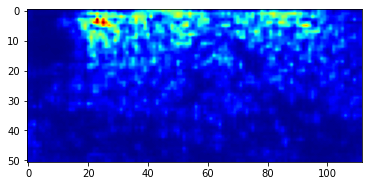

Original Count :  392


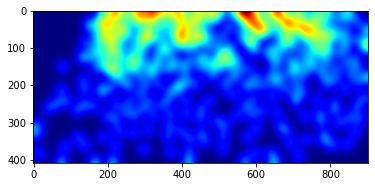

Original Image


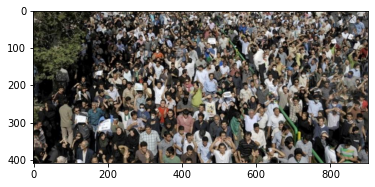

In [6]:
from matplotlib import cm as c
img = transform(Image.open('E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_100.jpg').convert('RGB'))

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\ground_truth\\IMG_100.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('E:\\New folder\\ShanghaiTech_Crowd_Counting_Dataset\\part_A_final\\test_data\\images\\IMG_100.jpg'))
plt.show()

Predicted Count :  380


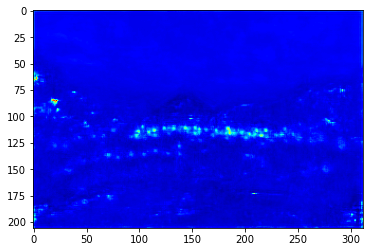

Original Image


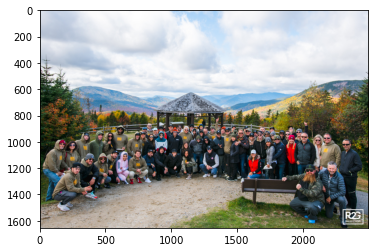

In [34]:
#new image data
from matplotlib import cm as c
#path=input("Enter file path")
img = transform(Image.open('E:\\New folder\\IMG2.jpg').convert('RGB'))

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
print("Original Image")
plt.imshow(plt.imread('E:\\New folder\\IMG2.jpg'))
plt.show()